# Comparision of different classification Algorithms on characters
---

In [72]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics,neighbors,linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [73]:
digits=datasets.load_digits()

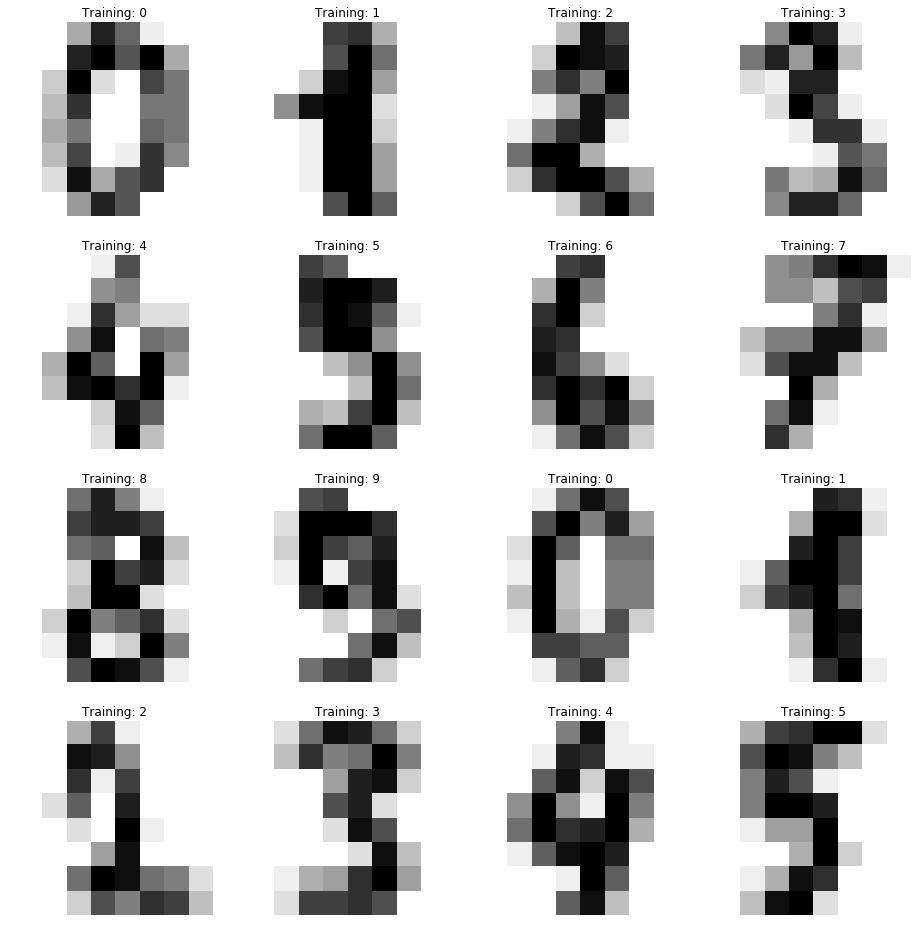

In [74]:
plt.figure(figsize=(16,16))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:16]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [75]:
holdout=[0.95, 0.90, 0.75, 0.50, 0.1, 0.05]
X,Y=digits.data, digits.target

In [76]:
#we declare the classifiers
classifiers=[("Logistic Regression",linear_model.LogisticRegression()),
             ("K-nearest Neighbours", neighbors.KNeighborsClassifier()),
             ("SV Classifier",svm.SVC(gamma=0.001)),
             ("Perceptron",linear_model.Perceptron())]

In [77]:
#x-axis for plotting performance for different holdouts
xx=1. - np.array(holdout)

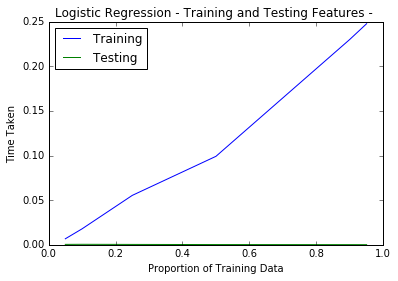

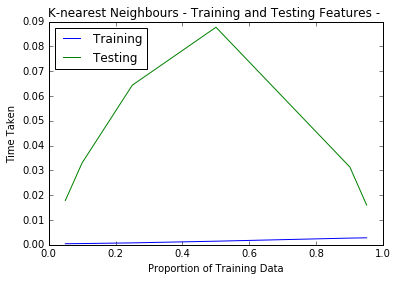

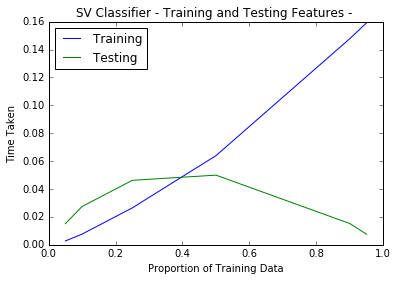

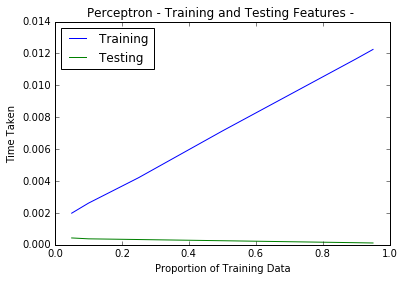

In [81]:
errors={name:list() for name,clf in classifiers} #y-axis for plotting performance for different holdouts
conf_matrices={name:'' for name,clf in classifiers}

#calculations
for name, clf in classifiers:
    rng = np.random.RandomState(42) #for random split of dataset into train and test 
    t_train=[]
    t_test=[]
    plt.figure(figsize=(6,4))
    for i in holdout:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=i, random_state=rng)
        start=time.time()
        clf.fit(X_train,Y_train) # we train the dataset
        t_train.append(time.time()-start)
        
        start=time.time()
        Y_pred=clf.predict(X_test) #making predictions
        t_test.append(time.time()-start)
        
        errors[name].append(1.-np.mean(Y_pred == Y_test))
        
        if i==0.05:
            conf_matrices[name]=metrics.confusion_matrix(Y_test, Y_pred)
    
    plt.title(name+" - Training and Testing Features - ")
    plt.plot(xx,t_train,label="Training")
    plt.plot(xx,t_test, label="Testing")
    plt.legend(loc="upper left")
    plt.xlabel("Proportion of Training Data")
    plt.ylabel("Time Taken")

In [82]:
for x in conf_matrices.keys():
    print("Confusion Matrix for %s - \n%s\n" %(x,conf_matrices[x]))

Confusion Matrix for K-nearest Neighbours - 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 14]]

Confusion Matrix for Perceptron - 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  2  0  0  0  1  1  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  1  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  1  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 14]]

Confusion Matrix for Logistic Regression - 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  1  0  0  0  0  1  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0 

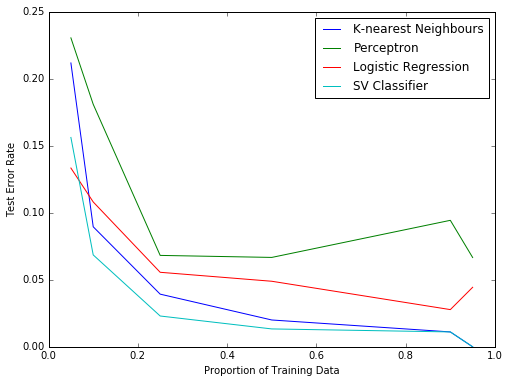

In [83]:
plt.figure(figsize=(8,6))
for x in errors.keys():
    plt.plot(xx,errors[x],label=x)
plt.legend(loc="upper right")
plt.xlabel("Proportion of Training Data")
plt.ylabel("Test Error Rate")
plt.show()